##Neural Network

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# dataset from Lesson17
df = pd.read_csv('winequality-red.csv')

df.columns = df.columns.str.replace(' ', '_')

In [3]:
df.loc[df['quality'] >= 6, 'quality'] = 1    # good wine
df.loc[df['quality'] < 6, 'quality'] = 0     # bad wine

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [5]:
X = df.iloc[:, :11]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_shape = (X_train.shape[1],)

model = keras.Sequential([
    keras.layers.Dense(11, activation='relu', input_shape=input_shape),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.7826 - accuracy: 0.6419 - val_loss: 0.6119 - val_accuracy: 0.7312
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.7654 - val_loss: 0.4546 - val_accuracy: 0.7969
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8163 - val_loss: 0.2409 - val_accuracy: 0.8562
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.8647 - val_loss: 0.1918 - val_accuracy: 0.8844
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.8819 - val_loss: 0.1383 - val_accuracy: 0.8875
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.8882 - val_loss: 0.0878 - val_accuracy: 0.8906
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.8913 - val_loss: 0.0546 - val_accuracy: 0.8875
Epoch 8/20
40/40 [==

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10/10 [==============================] - 0s 2ms/step - loss: 2.7310e-04 - accuracy: 0.9969
Test accuracy: 0.996874988079071
Test loss: 0.0002731044078245759


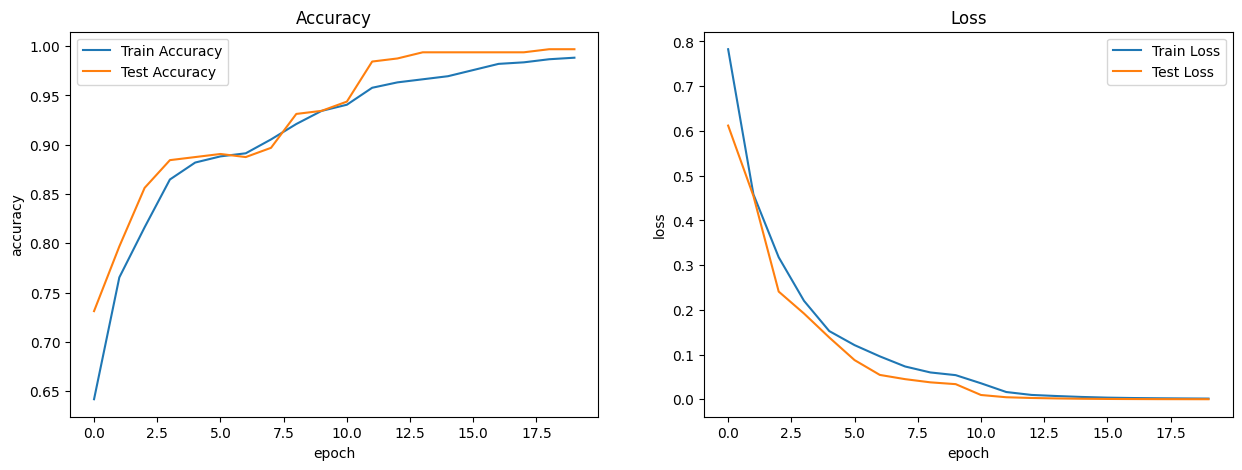

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

# MNIST

In [6]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

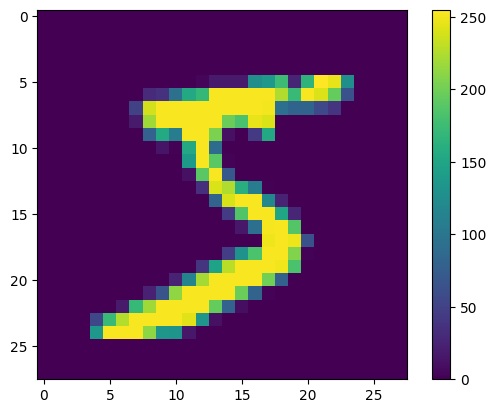

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

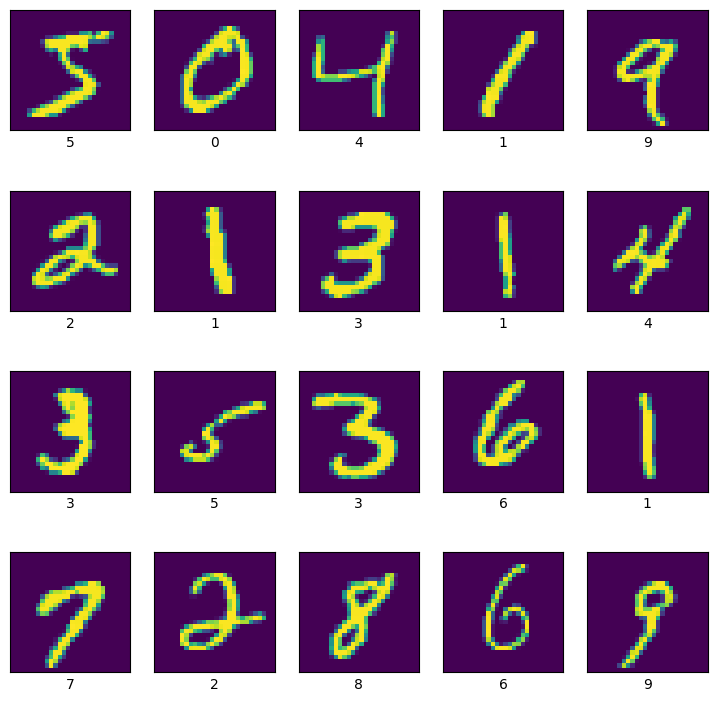

In [10]:
plt.figure(figsize=(9,9))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_labels[train_labels[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2569 - accuracy: 0.9269 - val_loss: 0.1274 - val_accuracy: 0.9610
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1116 - accuracy: 0.9674 - val_loss: 0.1164 - val_accuracy: 0.9649
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0773 - accuracy: 0.9772 - val_loss: 0.0974 - val_accuracy: 0.9695
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.0923 - val_accuracy: 0.9703
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0747 - val_accuracy: 0.9771
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0778 - val_accuracy: 0.9772
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0713 - val_accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9819
Test accuracy: 0.9818999767303467
Test loss: 0.09404158592224121


In [15]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


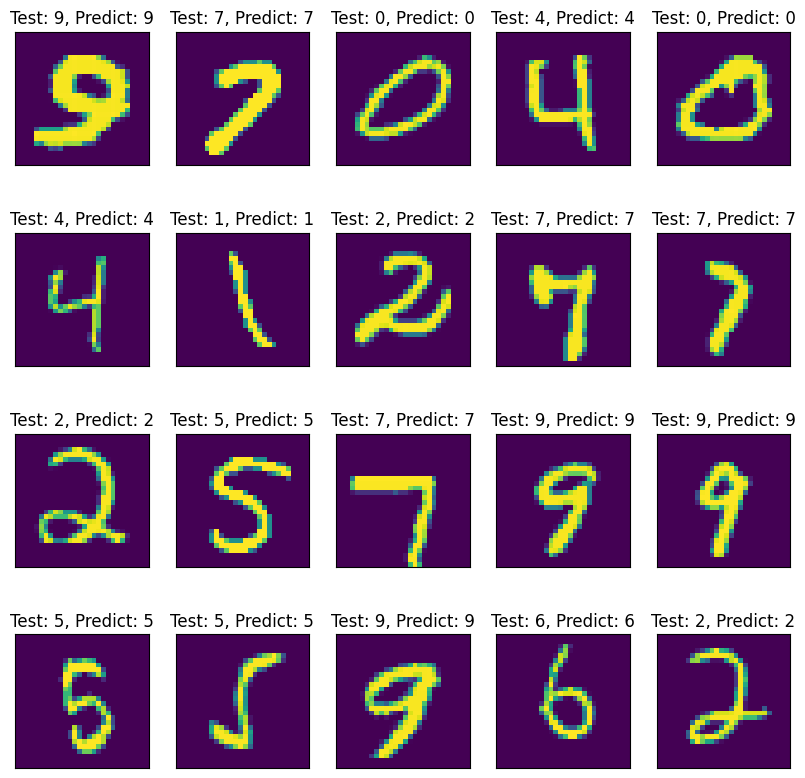

In [16]:
import random

plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  idx = random.randint(0, len(test_labels))
  predict = np.argmax(predictions[idx])
  test = test_labels[idx]
  plt.imshow(test_images[idx])
  plt.title(f'Test: {test}, Predict: {predict}')
plt.show()

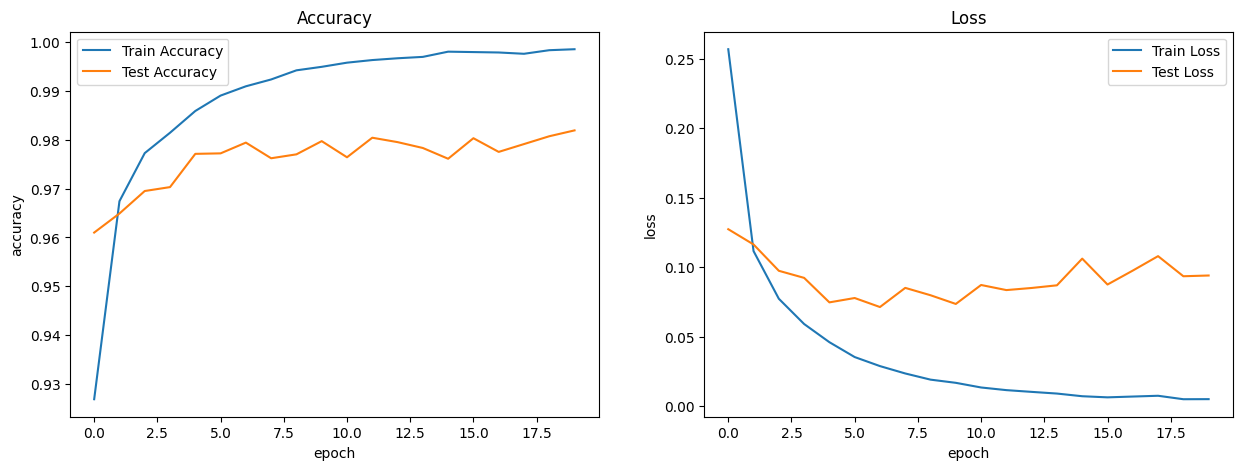

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()